In [1]:
import matplotlib.pyplot as plt
import cv2
from features import color_conversion, get_hog_features

print("Done Importing")

Done Importing


In [2]:
# Use the following two lines to generate txt files to store the filenames for vehicle and non-vehicle data
# find vehicles -name '*.png' > vehicle-images.txt
# find non-vehicles -name '*.png' > non-vehicle-images.txt
# Iterate through the txt file and save the filenames as a list
with open('./vehicle-images.txt', 'r') as f:
    car_filenames = f.read().splitlines() 
n_cars = len(car_filenames)
print("Numbers of vehicle dataset:", n_cars)

with open('./non-vehicle-images.txt', 'r') as f:
    notcar_filenames = f.read().splitlines()
n_notcars = len(notcar_filenames)
print("Numbers of non vehicle dataset:", n_notcars)

Numbers of vehicle dataset: 8792
Numbers of non vehicle dataset: 8968


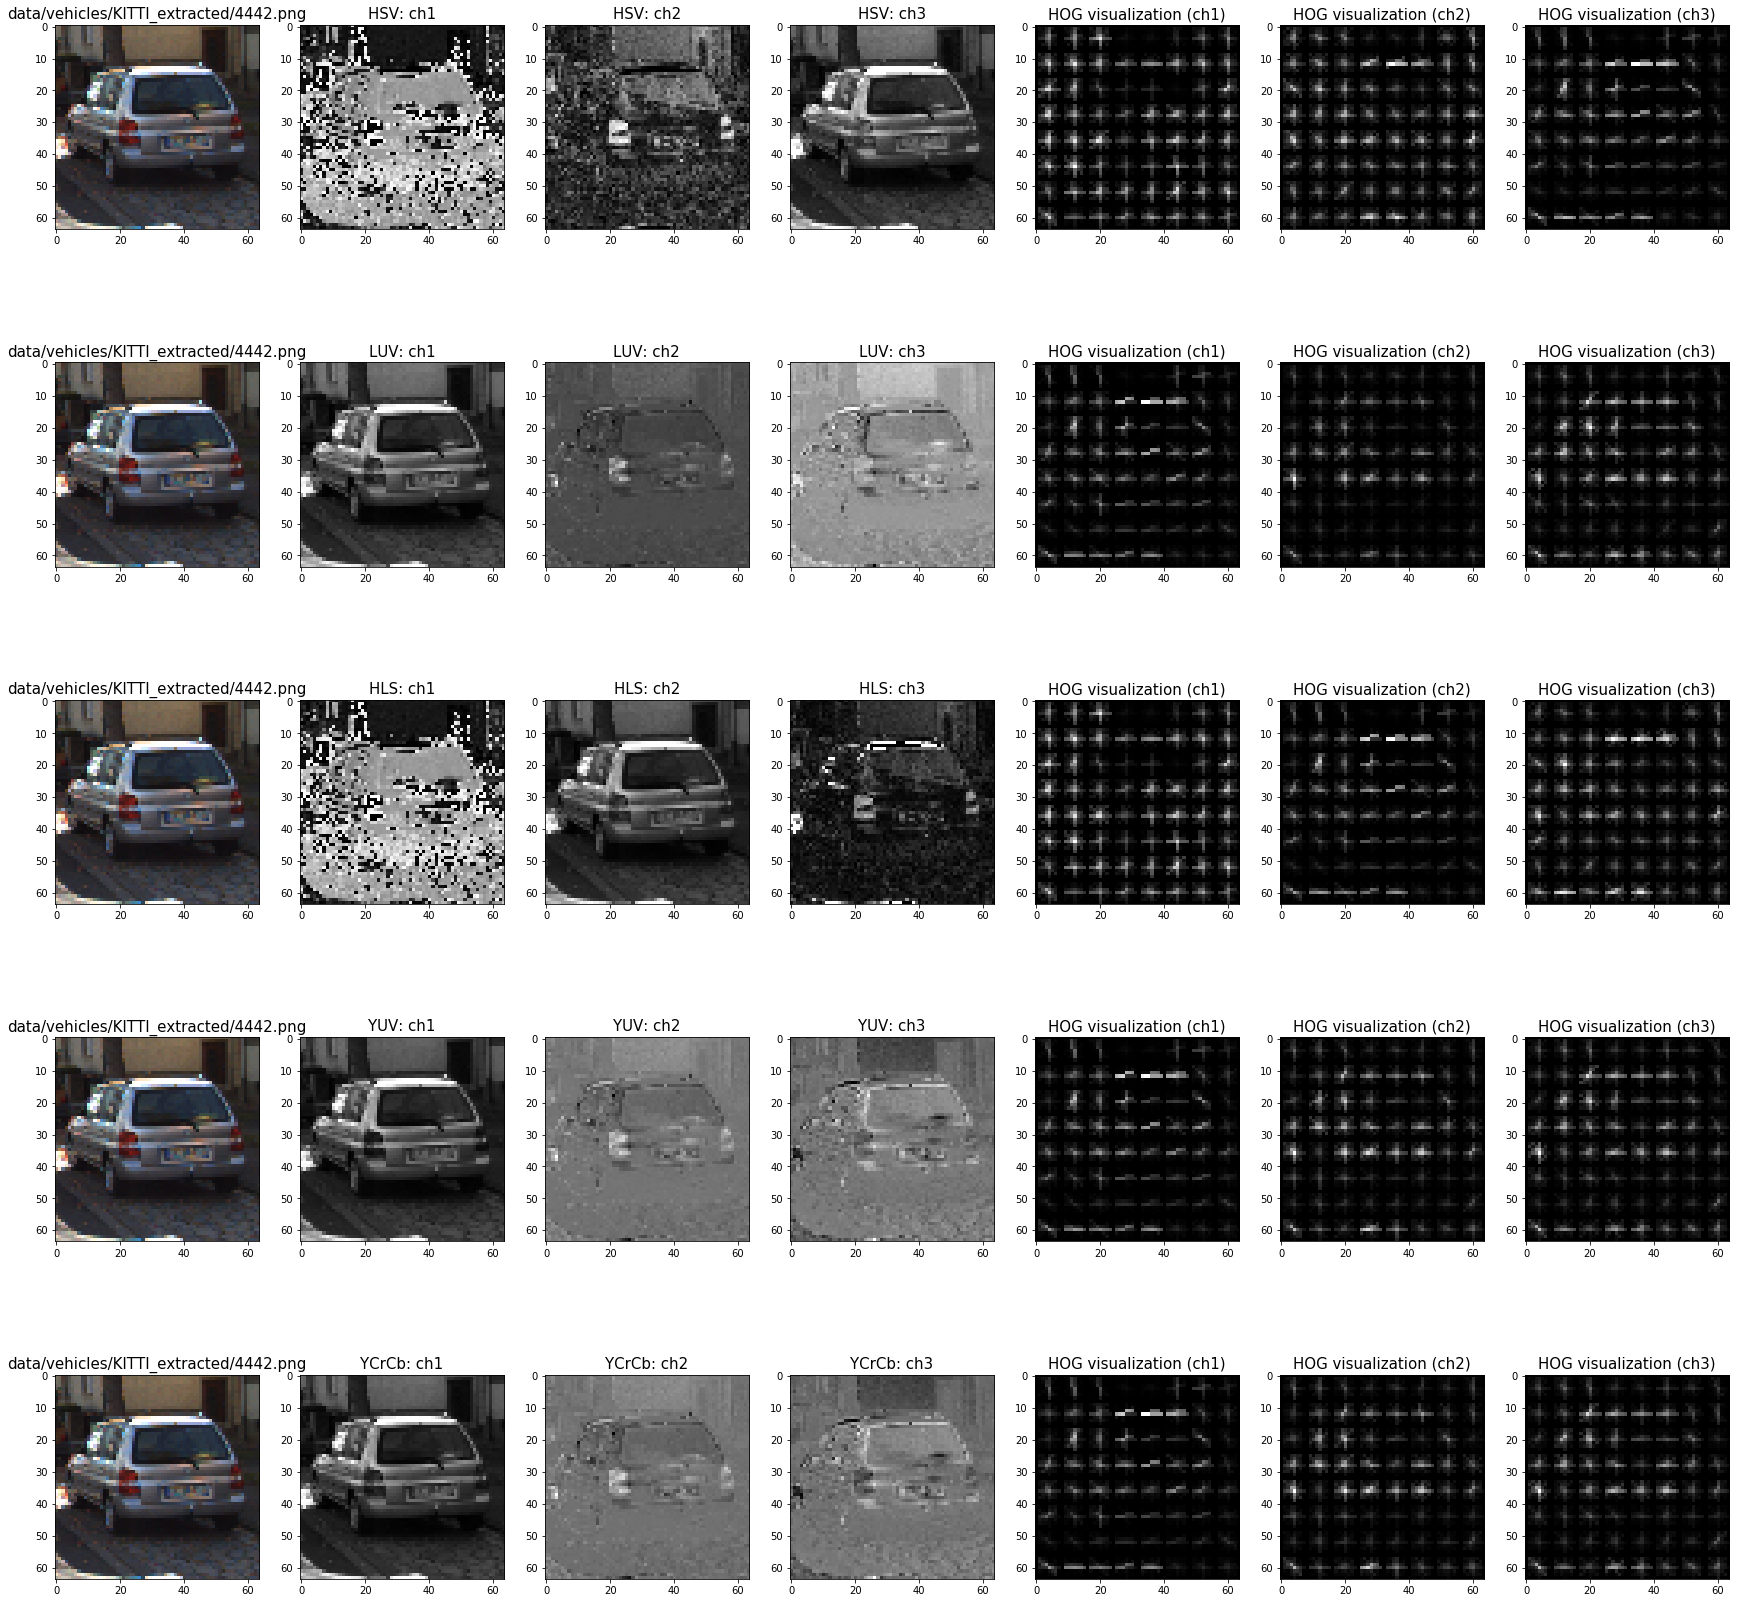

In [3]:
%matplotlib inline

# car_ind = np.random.randint(0, n_cars)
filename = car_filenames[6649]
color_spaces = ['HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']

types = 7
f, axes = plt.subplots(len(color_spaces), types, figsize=(30,30))
axes = axes.ravel()

for i, color_space in enumerate(color_spaces):
    image = cv2.imread(filename)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[types*i].imshow(rgb_image)
    axes[types*i].set_title(filename, fontsize=15)
    
    color_converted = color_conversion(rgb_image, color_space=color_space)
    axes[types*i+1].imshow(color_converted[:,:,0], cmap='gray')
    axes[types*i+1].set_title(color_space + ': ch1' , fontsize=15)
    
    axes[types*i+2].imshow(color_converted[:,:,1], cmap='gray')
    axes[types*i+2].set_title(color_space + ': ch2', fontsize=15)
    
    axes[types*i+3].imshow(color_converted[:,:,2], cmap='gray')
    axes[types*i+3].set_title(color_space + ': ch3', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,0], orient= 12, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+4].imshow(hog_image, cmap='gray')
    axes[types*i+4].set_title('HOG visualization (ch1)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,1], orient= 12, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+5].imshow(hog_image, cmap='gray')
    axes[types*i+5].set_title('HOG visualization (ch2)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,2], orient= 12, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+6].imshow(hog_image, cmap='gray')
    axes[types*i+6].set_title('HOG visualization (ch3)', fontsize=15)

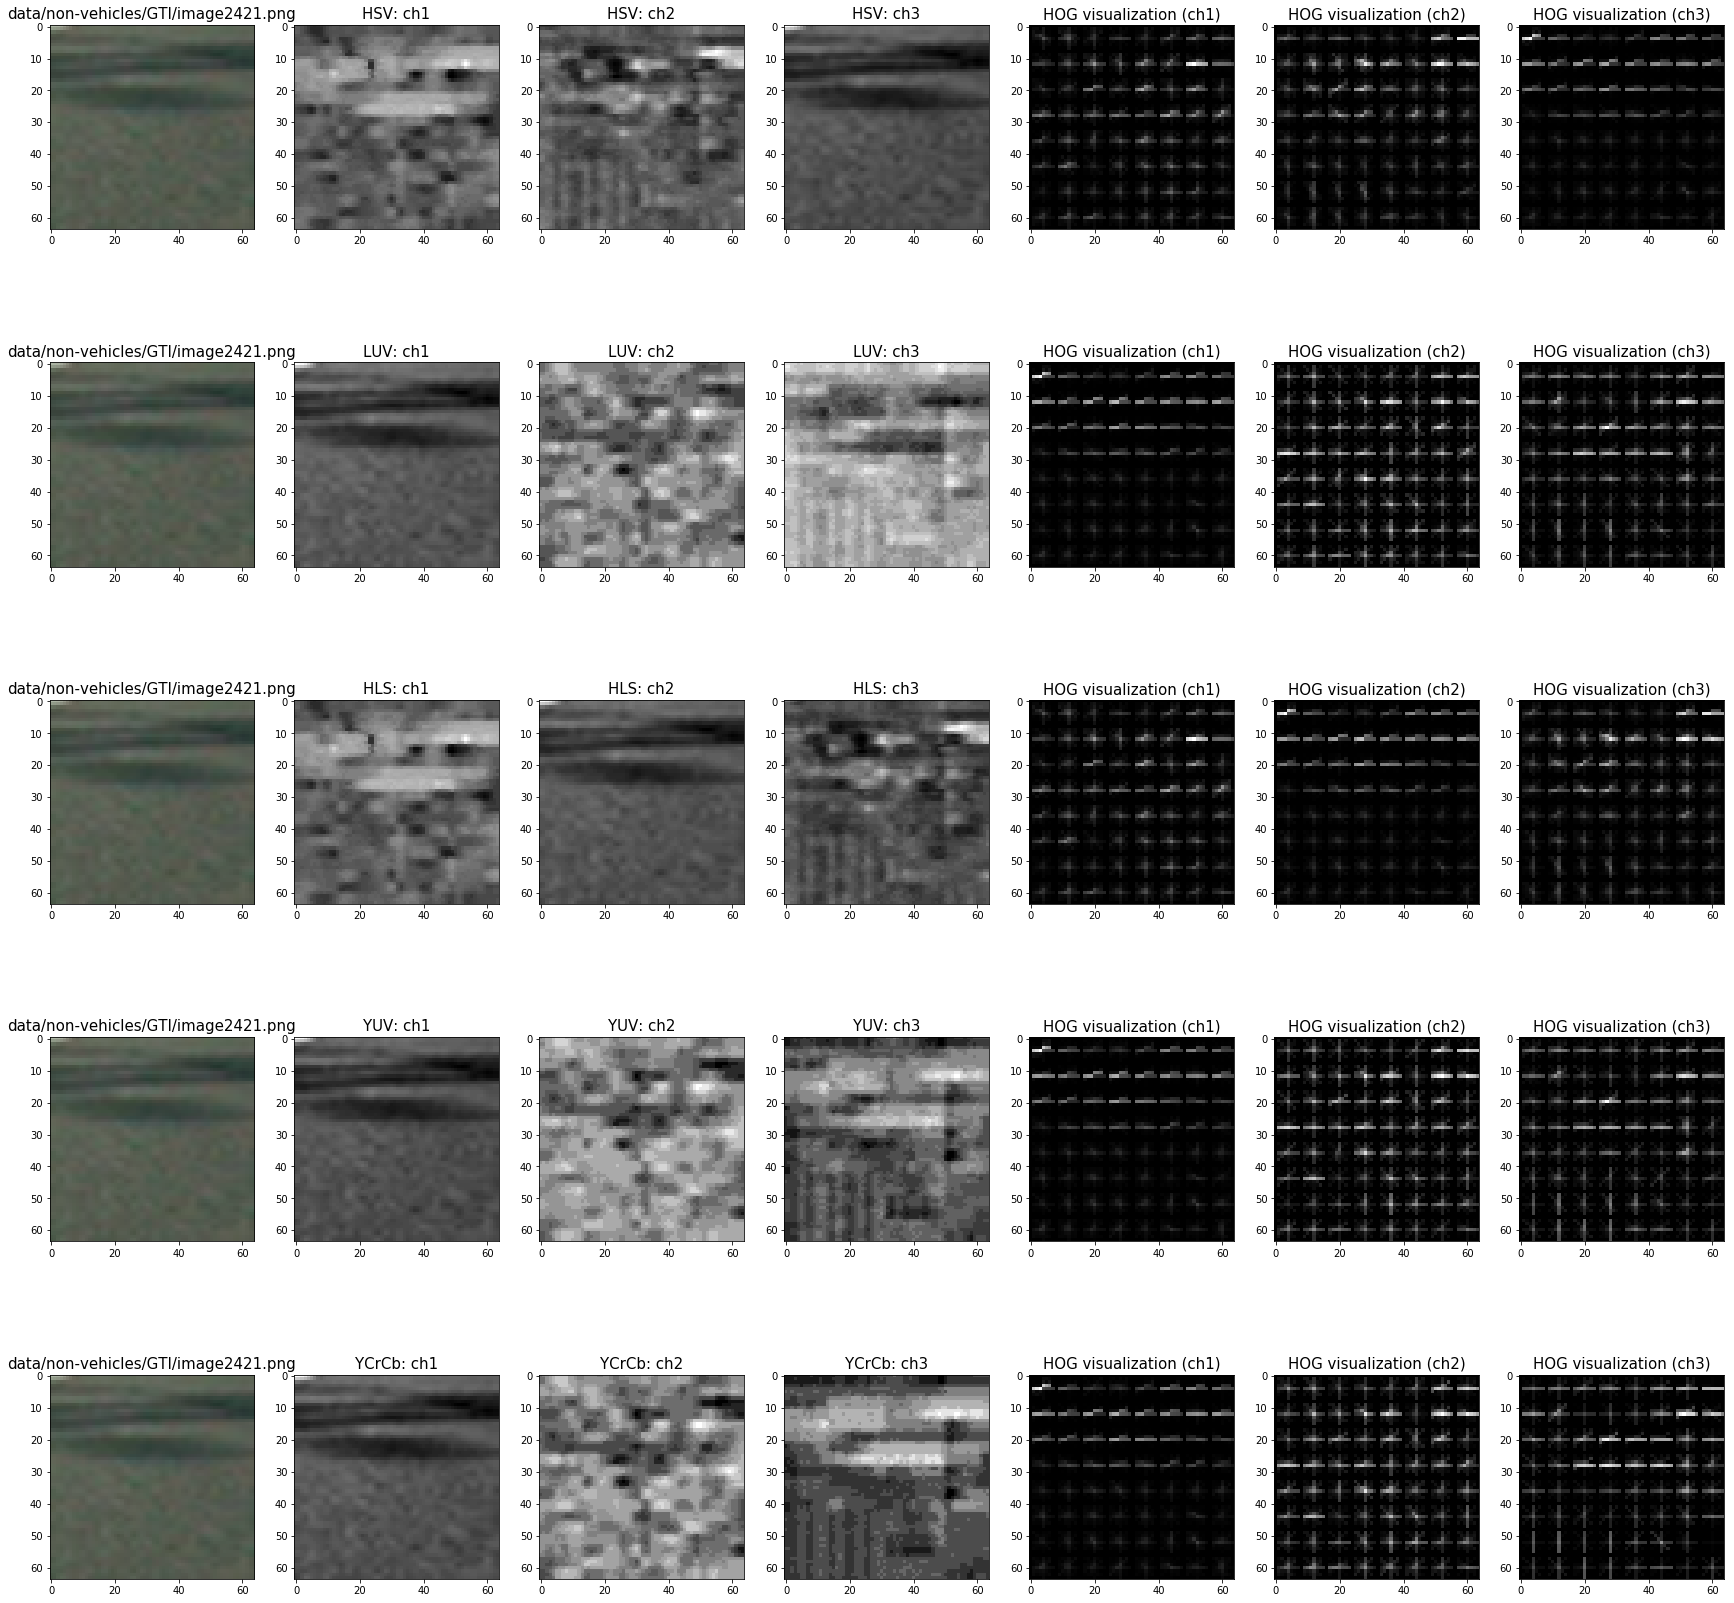

In [4]:
%matplotlib inline

# notcar_ind = np.random.randint(0, n_notcars)
filename = notcar_filenames[6649]

types = 7
f, axes = plt.subplots(len(color_spaces), types, figsize=(30,30))
axes = axes.ravel()

for i, color_space in enumerate(color_spaces):
    image = cv2.imread(filename)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[types*i].imshow(rgb_image)
    axes[types*i].set_title(filename, fontsize=15)
    
    color_converted = color_conversion(rgb_image, color_space=color_space)
    axes[types*i+1].imshow(color_converted[:,:,0], cmap='gray')
    axes[types*i+1].set_title(color_space + ': ch1' , fontsize=15)
    
    axes[types*i+2].imshow(color_converted[:,:,1], cmap='gray')
    axes[types*i+2].set_title(color_space + ': ch2', fontsize=15)
    
    axes[types*i+3].imshow(color_converted[:,:,2], cmap='gray')
    axes[types*i+3].set_title(color_space + ': ch3', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,0], orient= 12, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+4].imshow(hog_image, cmap='gray')
    axes[types*i+4].set_title('HOG visualization (ch1)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,1], orient= 12, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+5].imshow(hog_image, cmap='gray')
    axes[types*i+5].set_title('HOG visualization (ch2)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,2], orient= 12, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+6].imshow(hog_image, cmap='gray')
    axes[types*i+6].set_title('HOG visualization (ch3)', fontsize=15)

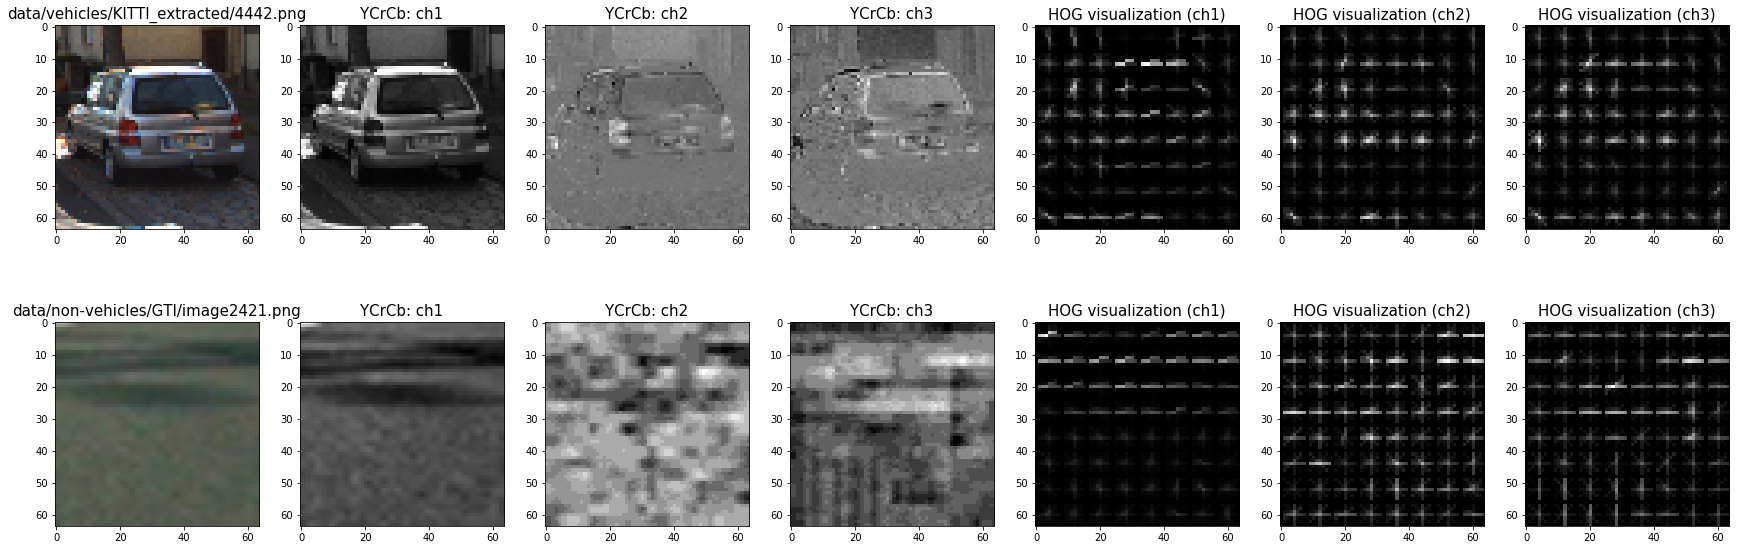

In [5]:
%matplotlib inline

filenames = [car_filenames[6649], notcar_filenames[6649]]

types = 7
f, axes = plt.subplots(len(filenames), types, figsize=(30,10))
axes = axes.ravel()

for i, filename in enumerate(filenames):
    image = cv2.imread(filename)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[types*i].imshow(rgb_image)
    axes[types*i].set_title(filename, fontsize=15)
    
    color_converted = color_conversion(rgb_image, color_space='YUV')
    axes[types*i+1].imshow(color_converted[:,:,0], cmap='gray')
    axes[types*i+1].set_title(color_space + ': ch1' , fontsize=15)
    
    axes[types*i+2].imshow(color_converted[:,:,1], cmap='gray')
    axes[types*i+2].set_title(color_space + ': ch2', fontsize=15)
    
    axes[types*i+3].imshow(color_converted[:,:,2], cmap='gray')
    axes[types*i+3].set_title(color_space + ': ch3', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,0], orient= 12, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+4].imshow(hog_image, cmap='gray')
    axes[types*i+4].set_title('HOG visualization (ch1)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,1], orient= 12, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+5].imshow(hog_image, cmap='gray')
    axes[types*i+5].set_title('HOG visualization (ch2)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,2], orient= 12, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+6].imshow(hog_image, cmap='gray')
    axes[types*i+6].set_title('HOG visualization (ch3)', fontsize=15)

plt.savefig('./output_images/hog_feature_YUV.png')